# **1. Import Libraries**

In [17]:
import cv2
import os
import shutil
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.util import random_noise
import matplotlib.pyplot as plt
from PIL import Image
from albumentations import Compose, HorizontalFlip, Rotate, GaussianBlur, RandomBrightnessContrast, GaussNoise
from albumentations.core.composition import OneOf

# **2. Load Data**


In [ ]:
# import tensorflow as tf
# tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
dataset_path = 'C:/Users/Lenovo/capstone/split_dataset'

# **3. Preprocess Data**

In [ ]:
# def delete_augmented_images(input_dir, prefix="aug"):
#     for class_name in os.listdir(input_dir):
#         class_path = os.path.join(input_dir, class_name)
#         if os.path.isdir(class_path):
#             for file_name in os.listdir(class_path):
#                 if file_name.startswith(prefix):
#                     file_path = os.path.join(class_path, file_name)
#                     try:
#                         os.remove(file_path)
#                         print(f"Deleted augmented image: {file_path}")
#                     except Exception as e:
#                         print(f"Error deleting file {file_path}: {e}")

In [ ]:
# delete_augmented_images(dataset_path)

Deleted augmented image: /content/drive/MyDrive/dataset/durga/aug_0_8275.jpg
Deleted augmented image: /content/drive/MyDrive/dataset/durga/aug_0_4161.jpg
Deleted augmented image: /content/drive/MyDrive/dataset/durga/aug_0_7965.jpg
Deleted augmented image: /content/drive/MyDrive/dataset/durga/aug_0_267.jpg
Deleted augmented image: /content/drive/MyDrive/dataset/durga/aug_0_1273.jpg
Deleted augmented image: /content/drive/MyDrive/dataset/durga/aug_0_6974.jpg
Deleted augmented image: /content/drive/MyDrive/dataset/durga/aug_0_3962.jpg
Deleted augmented image: /content/drive/MyDrive/dataset/durga/aug_0_3465.jpg
Deleted augmented image: /content/drive/MyDrive/dataset/durga/aug_0_651.jpg
Deleted augmented image: /content/drive/MyDrive/dataset/durga/aug_0_3111.jpg
Deleted augmented image: /content/drive/MyDrive/dataset/durga/aug_0_8052.jpg
Deleted augmented image: /content/drive/MyDrive/dataset/durga/aug_0_5131.jpg
Deleted augmented image: /content/drive/MyDrive/dataset/durga/aug_0_7403.jpg
D

In [ ]:
# def apply_motion_blur(image, kernel_size=5):
#     kernel = np.zeros((kernel_size, kernel_size))
#     kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
#     kernel = kernel / kernel_size
#     return cv2.filter2D(image, -1, kernel)

# def add_gaussian_noise(image):
#     mean = 0
#     variance = 0.001
#     stddev = np.sqrt(variance)

#     # Menghasilkan Gaussian noise
#     gaussian_noise = np.random.normal(mean, stddev, image.shape).astype(np.float32)

#     # Menambahkan noise pada gambar asli
#     noisy_image = image.astype(np.float32) / 255.0 + gaussian_noise
#     noisy_image = np.clip(noisy_image, 0, 1.0)  # Rentang nilai 0-1
#     noisy_image = (noisy_image * 255).astype(np.uint8)  # Konversi ke rentang 0-255 dan tipe uint8

#     return noisy_image


In [ ]:
# def augment_images(input_dir, min_images=600, target_size=(224, 224)):
#     datagen = keras.preprocessing.image.ImageDataGenerator(
#         rotation_range=10,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest'
#     )

#     for class_name in os.listdir(input_dir):
#         class_path = os.path.join(input_dir, class_name)
#         if os.path.isdir(class_path):
#             images = os.listdir(class_path)
#             num_images = len(images)
#             if num_images < min_images:
#                 num_to_generate = min_images - num_images
#                 print(f"Augmenting {num_to_generate} images for class {class_name}")

#                 for i in range(num_to_generate):
#                     img_name = images[i % num_images]
#                     img_path = os.path.join(class_path, img_name)
#                     try:
#                         img = cv2.imread(img_path)
#                         if img is None:
#                             print(f"Failed to load image: {img_path}")
#                             continue

#                         img = cv2.resize(img, target_size)

#                         # Efek augmentasi tambahan secara acak
#                         if random.choice([True, False]):
#                             img = apply_motion_blur(img)
#                         if random.choice([True, False]):
#                             img = add_gaussian_noise(img)

#                         x = keras.preprocessing.image.img_to_array(img)
#                         x = x.reshape((1,) + x.shape)

#                         for batch in datagen.flow(x, batch_size=1, save_to_dir=class_path, save_prefix='aug', save_format='jpg'):
#                             break
#                     except Exception as e:
#                         print(f"Error augmenting image {img_path}: {e}")



In [ ]:
# augment_images(dataset_path)

Augmenting 315 images for class durga
Augmenting 450 images for class gupolo
Augmenting 244 images for class nandhi
Augmenting 196 images for class surya
Augmenting 191 images for class candra


In [ ]:
# def resize_images(input_dir, output_dir, target_size=(224, 224)):
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)

#     for class_name in os.listdir(input_dir):
#         class_path = os.path.join(input_dir, class_name)
#         output_class_path = os.path.join(output_dir, class_name)
#         if not os.path.exists(output_class_path):
#             os.makedirs(output_class_path)

#         if os.path.isdir(class_path):
#             for img_name in os.listdir(class_path):
#                 img_path = os.path.join(class_path, img_name)
#                 try:
#                     with Image.open(img_path) as img:
#                         img_resized = img.resize(target_size)
#                         img_resized.save(os.path.join(output_class_path, img_name))
#                 except Exception as e:
#                     print(f"Error resizing image {img_path}: {e}")

In [12]:
resized_dataset_path = '/content/drive/MyDrive/resized_dataset'

In [ ]:
# resize_images(dataset_path, resized_dataset_path)

In [ ]:
def split_dataset(input_dir, output_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for class_name in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_name)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            train, temp = train_test_split(images, train_size=train_ratio, random_state=42)
            val, test = train_test_split(temp, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

            for split_name, split_data in zip(['train', 'val', 'test'], [train, val, test]):
                split_path = os.path.join(output_dir, split_name, class_name)
                if not os.path.exists(split_path):
                    os.makedirs(split_path)
                for img_name in split_data:
                    shutil.copy(os.path.join(class_path, img_name), os.path.join(split_path, img_name))

split_dataset(resized_dataset_path, '/content/drive/MyDrive/split_dataset')

In [23]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
val_test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

In [25]:
train_generator = train_datagen.flow_from_directory(
    r'C:/Users/Lenovo/capstone/split_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_test_datagen.flow_from_directory(
    r'C:/Users/Lenovo/capstone/split_dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    r'C:/Users/Lenovo/capstone/split_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 5007 images belonging to 10 classes.
Found 1074 images belonging to 10 classes.
Found 1078 images belonging to 10 classes.


In [27]:
from collections import Counter
train_labels = train_generator.classes
print("Distribusi awal:", Counter(train_labels))

Distribusi awal: Counter({9: 758, 7: 685, 5: 536, 4: 482, 0: 453, 1: 420, 3: 420, 2: 418, 6: 418, 8: 417})


# **4. Model Build**

In [29]:
# Definisi model dengan perbaikan
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),

    # Block 1
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Block 2
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Block 3
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Block 4
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Global Average Pooling
    tf.keras.layers.GlobalAveragePooling2D(),

    # Fully Connected Layer dengan Dropout
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),

    # Output Layer
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model dengan optimizer dan callback
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

# Inisialisasi callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',   # Metode pemantauan (contohnya val_loss atau val_accuracy)
    patience=3,           # Jumlah epoch tanpa peningkatan sebelum menghentikan pelatihan
    restore_best_weights=True  # Mengembalikan bobot terbaik setelah pelatihan selesai
)

In [33]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

D:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 92s 559ms/step - accuracy: 0.2224 - loss: 2.3917 - val_accuracy: 0.0838 - val_loss: 2.4349
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 53s 336ms/step - accuracy: 0.4500 - loss: 1.7736 - val_accuracy: 0.1015 - val_loss: 2.5178
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 53s 339ms/step - accuracy: 0.5456 - loss: 1.5258 - val_accuracy: 0.2989 - val_loss: 2.0107
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 332ms/step - accuracy: 0.6196 - loss: 1.3379 - val_accuracy: 0.6406 - val_loss: 1.3374
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 330ms/step - accuracy: 0.6454 - loss: 1.1961 - val_accuracy: 0.8156 - val_loss: 0.9872
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 312ms/step - accuracy: 0.6925 - loss: 1.1018 - val_accuracy: 0.8315 - val_loss: 0.8800
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 330ms/step - accuracy: 0.7389 - loss: 0.9808 - val_accuracy: 0.8436 - val_loss: 0.8097
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 314ms/step - accuracy: 0.7520 - loss: 0

In [35]:
# 5. Evaluate Model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")



34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 312ms/step - accuracy: 0.9627 - loss: 0.2693
Test Accuracy: 96.47%
Test Loss: 0.2693


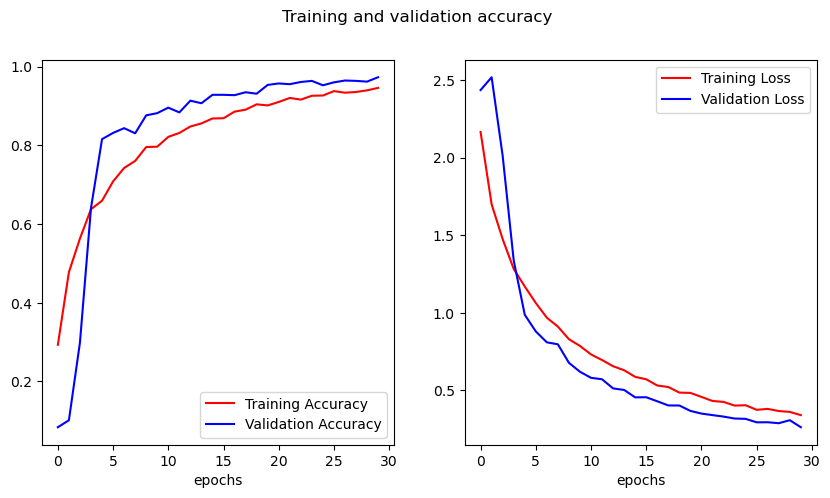

In [37]:
import matplotlib.pyplot as plt
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setup ImageDataGenerator
img_size = (224, 224)  # Ganti sesuai dengan input model Anda
batch_size = 32

datagen = ImageDataGenerator(rescale=1.0 / 255)
generator = datagen.flow_from_directory(
    directory="C:/Users/Lenovo/capstone/split_dataset/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

# Predict with the model
predictions = model.predict(generator)
predicted_classes = np.argmax(predictions, axis=1)

# Map true labels
true_classes = generator.classes
class_indices = generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}

# Print some results
print(true_classes[10:], predicted_classes[10:])

Found 1078 images belonging to 10 classes.
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step
[0 0 0 ... 9 9 9] [0 0 0 ... 9 9 1]


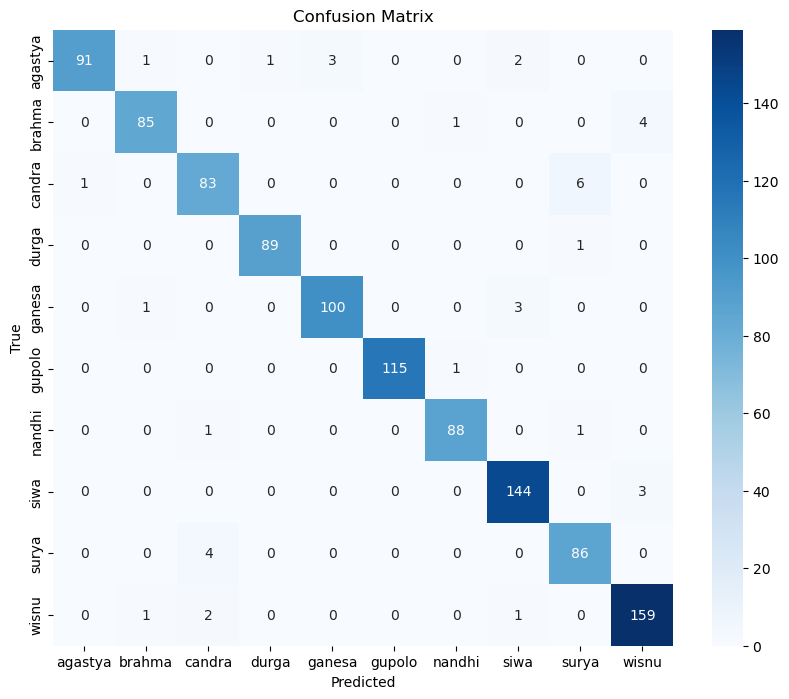

              precision    recall  f1-score   support

     agastya       0.99      0.93      0.96        98
      brahma       0.97      0.94      0.96        90
      candra       0.92      0.92      0.92        90
       durga       0.99      0.99      0.99        90
      ganesa       0.97      0.96      0.97       104
      gupolo       1.00      0.99      1.00       116
      nandhi       0.98      0.98      0.98        90
        siwa       0.96      0.98      0.97       147
       surya       0.91      0.96      0.93        90
       wisnu       0.96      0.98      0.97       163

    accuracy                           0.96      1078
   macro avg       0.96      0.96      0.96      1078
weighted avg       0.97      0.96      0.96      1078



In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_indices.keys(), yticklabels=class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
report = classification_report(true_classes, predicted_classes, target_names=list(class_indices.keys()))
print(report)

In [43]:
model.save('C:/Users/Lenovo/capstone/ArteFacto_model.keras')